## Imports and Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_x = pd.read_csv("data/X_train.csv")
raw_y = pd.read_csv("data/y_train.csv")

In [3]:
raw_data = raw_x.copy()
raw_data["Regulated"] = raw_y["Regulated"]

In [4]:
#data is initially split it x and y, combine it into one df for cleaning
raw_data.head(5)

,chr,start,end,name,chrTSS,startTSS,endTSS,TargetGene,ReferenceID,CellType,...,normalizedDNase_enh,normalizedDNase_prom,numNearbyEnhancers,sumNearbyEnhancers,ubiquitousExpressedGene,3DContact,3DContact_squared,normalizedDNase_enh_squared,ABC.Score,Regulated
0,chr8,60284882,60285382,CA8|chr8:61197441-61197941:.,chr8,60281411.0,60281412.0,CA8,2f957f7a,K562,...,9.255186,0.691692,46,215.634522,0,11482.332360,1.318440e+08,85.658468,0.229877,True
1,chr9,99075179,99075797,TGFBR1|chr9:101837461-101838079:.,chr9,99104038.0,99104039.0,TGFBR1,2f957f7a,K562,...,18.483246,0.798897,98,1196.610723,0,1833.345234,3.361155e+06,341.630383,0.044430,True
2,chr7,134639833,134640333,BPGM|chr7:134324585-134325085:.,chr7,134646808.0,134646809.0,BPGM,2f957f7a,K562,...,6.521952,0.992838,48,65.289744,0,10744.950360,1.154540e+08,42.535858,0.053048,True
3,chr10,5472235,5472735,NET1|chr10:5514198-5514698:.,chr10,5412551.0,5412552.0,NET1,2f957f7a,K562,...,2.925616,0.755541,33,94.653009,0,1419.128316,2.013925e+06,8.559229,0.004903,True
4,chr4,55723369,55723869,NMU|chr4:56589536-56590036:.,chr4,55636697.0,55636698.0,NMU,2f957f7a,K562,...,0.979523,0.598229,29,21.614425,0,793.318224,6.293538e+05,0.959465,0.001483,True


## Data Cleaning

In [5]:
#check each columb for missing values
raw_data.isna().sum()
#when checking which class the missing values belong too, almost all of them belong to the regulated == False category
#this indicates that they could be features with high importance

chr                               0
start                             0
end                               0
name                              0
chrTSS                            0
startTSS                         70
endTSS                           70
TargetGene                        0
ReferenceID                       0
CellType                          0
EffectSize                        0
pValueAdjusted                   15
Significant                       0
PowerAtEffectSize25               6
PowerAtEffectSize10            2896
PowerAtEffectSize15            2896
PowerAtEffectSize20            2896
PowerAtEffectSize50            2896
distanceToTSS                     0
numTSSEnhGene                     0
numCandidateEnhGene               0
normalizedDNase_enh               0
normalizedDNase_prom              0
numNearbyEnhancers                0
sumNearbyEnhancers                0
ubiquitousExpressedGene           0
3DContact                         0
3DContact_squared           

In [6]:
#Checking for the prescence of missing values in "Regulated" = True
raw_data[raw_data["Regulated"]==True].isna().sum()

chr                             0
start                           0
end                             0
name                            0
chrTSS                          0
startTSS                        0
endTSS                          0
TargetGene                      0
ReferenceID                     0
CellType                        0
EffectSize                      0
pValueAdjusted                 14
Significant                     0
PowerAtEffectSize25             6
PowerAtEffectSize10            71
PowerAtEffectSize15            71
PowerAtEffectSize20            71
PowerAtEffectSize50            71
distanceToTSS                   0
numTSSEnhGene                   0
numCandidateEnhGene             0
normalizedDNase_enh             0
normalizedDNase_prom            0
numNearbyEnhancers              0
sumNearbyEnhancers              0
ubiquitousExpressedGene         0
3DContact                       0
3DContact_squared               0
normalizedDNase_enh_squared     0
ABC.Score     

In [7]:
#Checking for the prescence of missing values in "Regulated" = False
raw_data[raw_data["Regulated"]==False].isna().sum()

chr                               0
start                             0
end                               0
name                              0
chrTSS                            0
startTSS                         70
endTSS                           70
TargetGene                        0
ReferenceID                       0
CellType                          0
EffectSize                        0
pValueAdjusted                    1
Significant                       0
PowerAtEffectSize25               0
PowerAtEffectSize10            2825
PowerAtEffectSize15            2825
PowerAtEffectSize20            2825
PowerAtEffectSize50            2825
distanceToTSS                     0
numTSSEnhGene                     0
numCandidateEnhGene               0
normalizedDNase_enh               0
normalizedDNase_prom              0
numNearbyEnhancers                0
sumNearbyEnhancers                0
ubiquitousExpressedGene           0
3DContact                         0
3DContact_squared           

In [8]:
#based off this we are taking the deicison to drop columns missing startTSS, endTSS and pValueAdjusted
raw_data= raw_data.dropna(subset=['startTSS', 'endTSS', 'pValueAdjusted'])

In [9]:
# according to the compeition write up the PowerAtEffectSize__ Columns 15-19
#were "used to filter the dataset and are most likely not relevant", hence we will drop those columns
raw_data_cleaned = raw_data.drop(columns=['PowerAtEffectSize25', 'PowerAtEffectSize15', 'PowerAtEffectSize20', 'PowerAtEffectSize50'])

In [10]:
df = raw_data_cleaned.copy()
df['Regulated'] = df['Regulated'].astype(int)
df.describe()

,start,end,startTSS,endTSS,EffectSize,pValueAdjusted,PowerAtEffectSize10,distanceToTSS,numTSSEnhGene,numCandidateEnhGene,normalizedDNase_enh,normalizedDNase_prom,numNearbyEnhancers,sumNearbyEnhancers,ubiquitousExpressedGene,3DContact,3DContact_squared,normalizedDNase_enh_squared,ABC.Score,Regulated
count,8.349000e+03,8.349000e+03,8.349000e+03,8.349000e+03,8349.000000,8349.000000,5538.000000,8.349000e+03,8349.000000,8349.000000,8349.000000,8349.000000,8349.000000,8349.000000,8349.000000,8349.000000,8.349000e+03,8349.000000,8349.000000,8349.000000
mean,6.242698e+07,6.242764e+07,6.244054e+07,6.244054e+07,-0.009063,0.849231,0.611873,4.500809e+05,12.761409,51.938196,7.352545,0.796067,239.093544,1656.377332,0.471434,775.926095,4.333573e+06,116.714465,0.005805,0.045035
std,5.232148e+07,5.232151e+07,5.231020e+07,5.231020e+07,0.055221,0.264581,0.148311,3.672910e+05,11.151764,38.834450,7.870540,0.150124,265.891064,2960.894012,0.499213,1930.833470,3.531318e+07,366.880616,0.019758,0.207394
min,1.429520e+05,1.434520e+05,5.301000e+04,5.301100e+04,-0.900693,0.000000,0.000000,1.158000e+03,0.000000,0.000000,0.527759,0.317115,0.000000,0.000000,0.000000,0.000139,1.930000e-08,0.278530,0.000000,0.000000
25%,1.686187e+07,1.686221e+07,1.707779e+07,1.707779e+07,-0.026025,0.841286,0.550000,1.527820e+05,4.000000,20.000000,2.505393,0.698756,60.000000,104.657984,0.000000,155.371845,2.414041e+04,6.276994,0.000449,0.000000
50%,4.879482e+07,4.879532e+07,4.889791e+07,4.889791e+07,-0.005512,0.973383,0.600000,3.735750e+05,9.000000,45.000000,4.891731,0.811405,146.000000,483.305728,0.000000,284.066175,8.069359e+04,23.929032,0.001265,0.000000
75%,1.003705e+08,1.003717e+08,1.001506e+08,1.001506e+08,0.014670,0.999918,0.700000,6.817790e+05,19.000000,75.000000,8.851811,0.926570,333.000000,1730.173550,1.000000,669.075547,4.476621e+05,78.354558,0.003743,0.000000
max,2.478551e+08,2.478556e+08,2.478572e+08,2.478572e+08,0.302337,1.000000,1.000000,2.375043e+06,68.000000,224.000000,98.373481,0.999952,1608.000000,23004.353250,1.000000,31300.961000,9.797502e+08,9677.341764,0.432450,1.000000


## Looking at the "Regulated" Column for Prediction

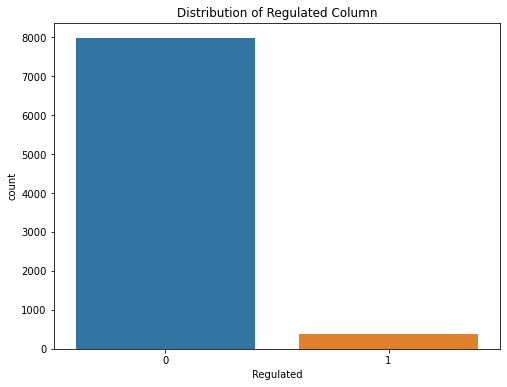

0    7973
1     376
Name: Regulated, dtype: int64

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Regulated')
plt.title('Distribution of Regulated Column')
plt.show()
df['Regulated'].value_counts()

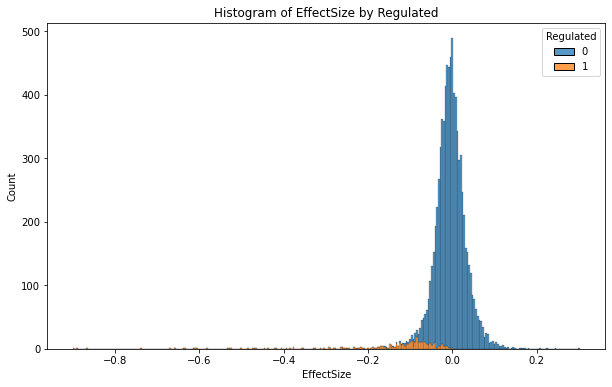

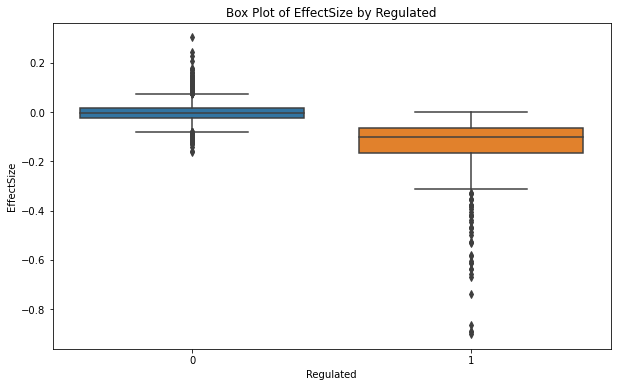

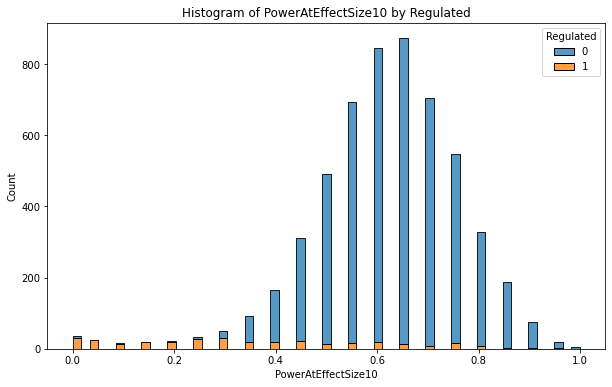

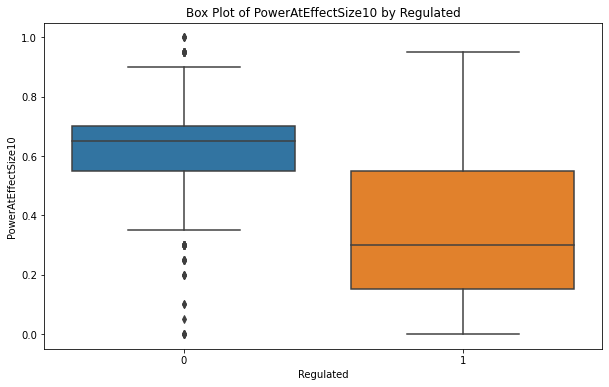

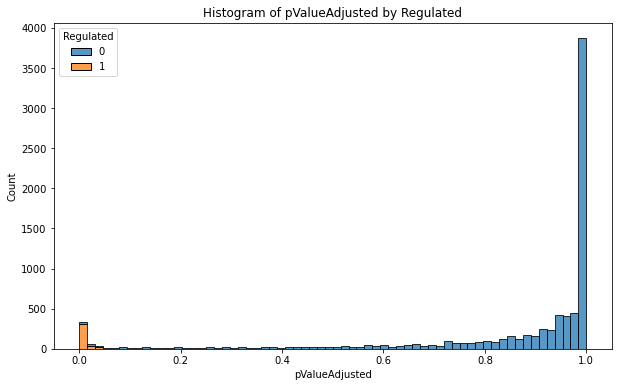

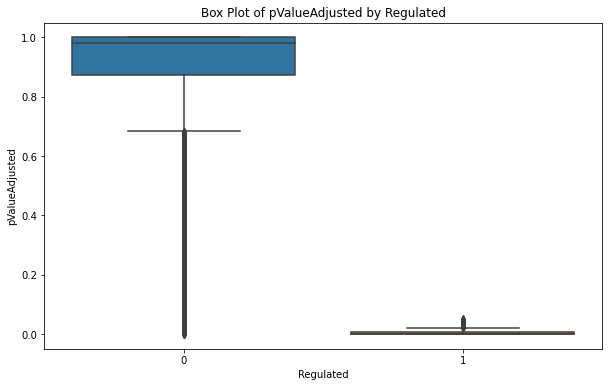

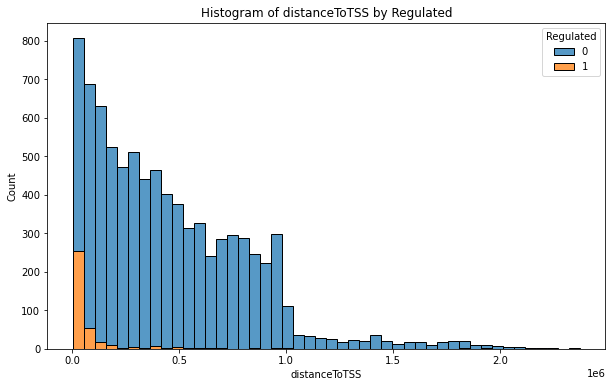

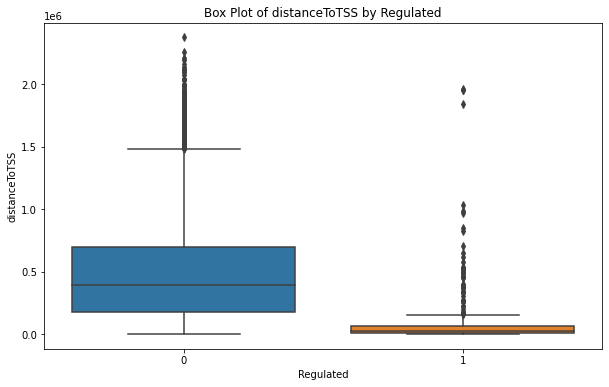

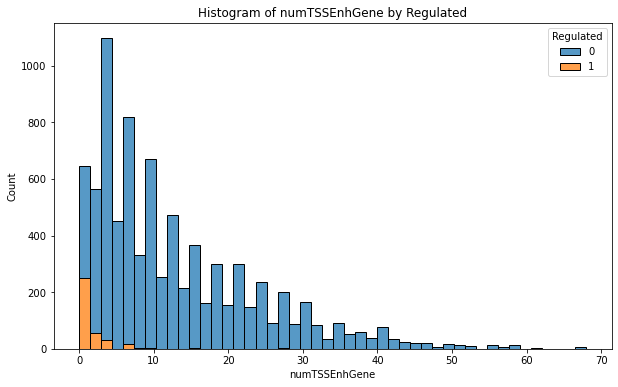

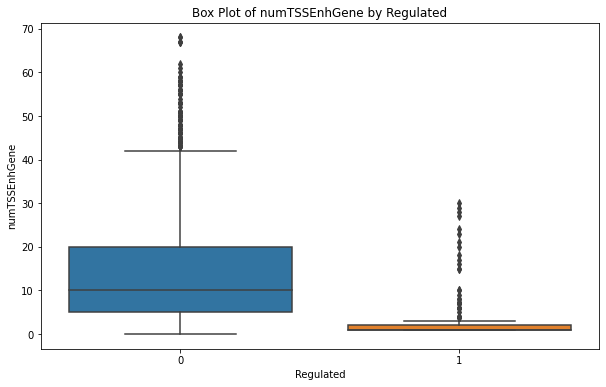

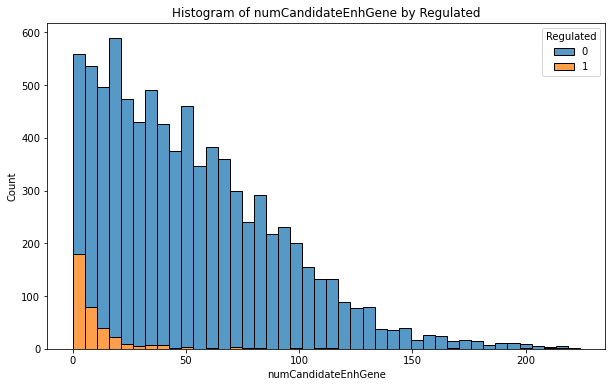

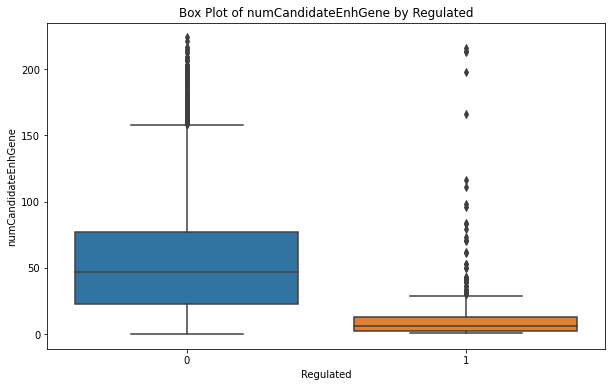

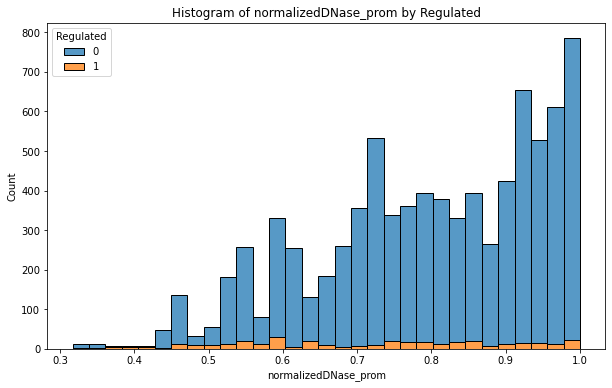

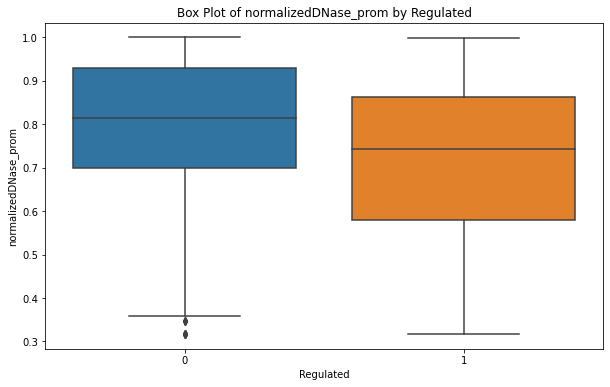

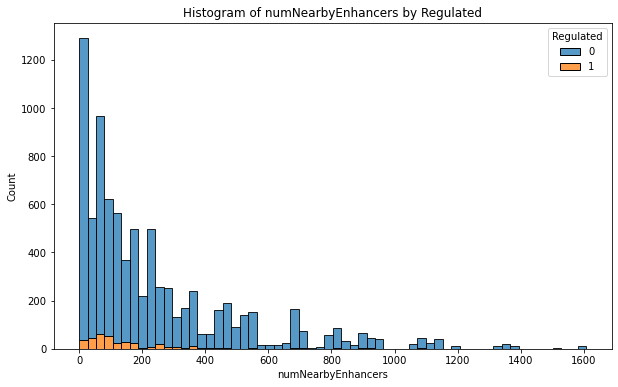

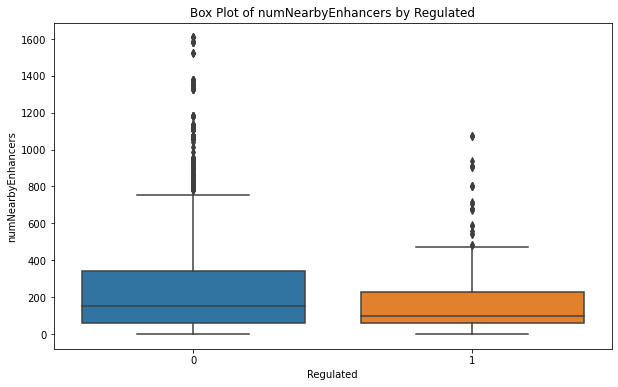

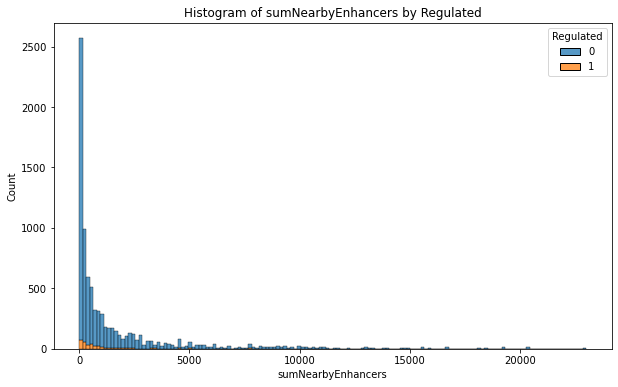

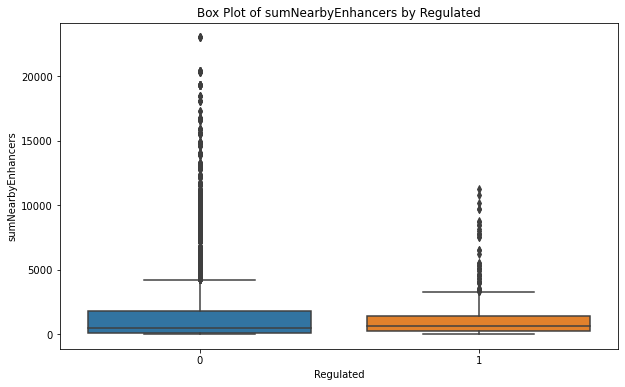

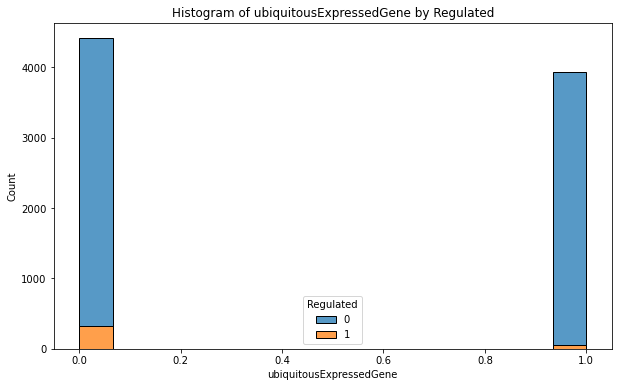

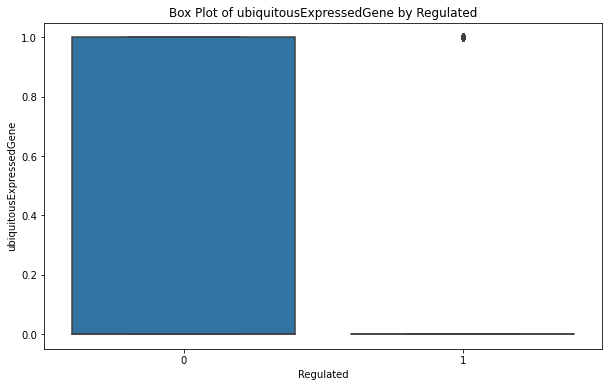

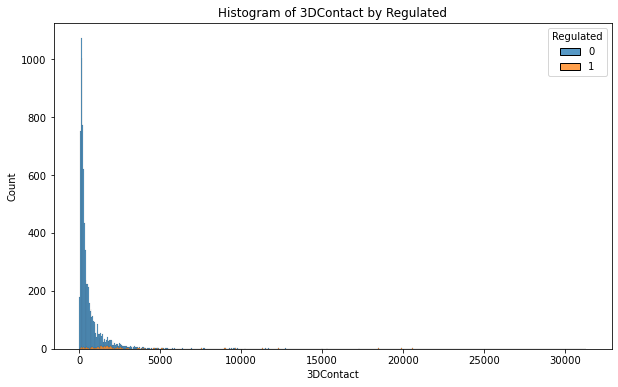

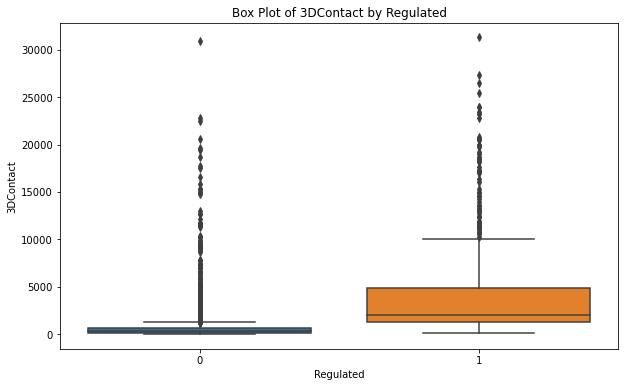

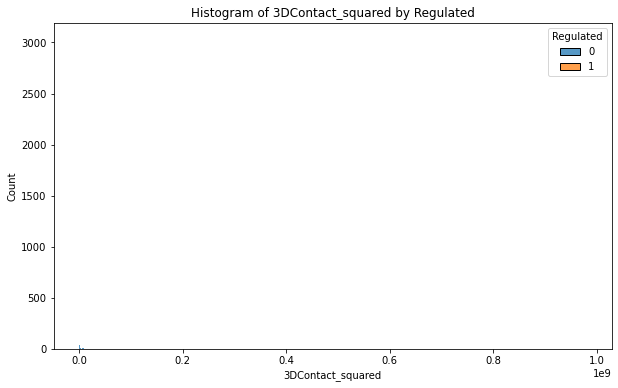

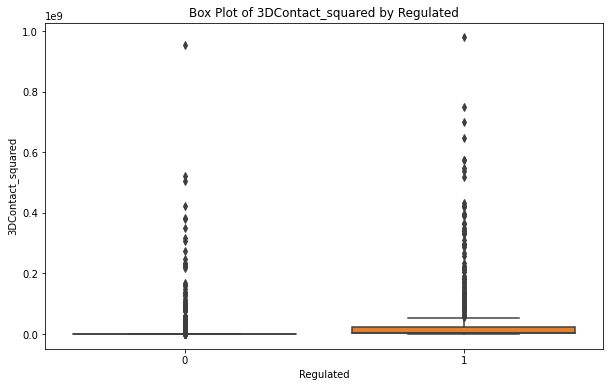

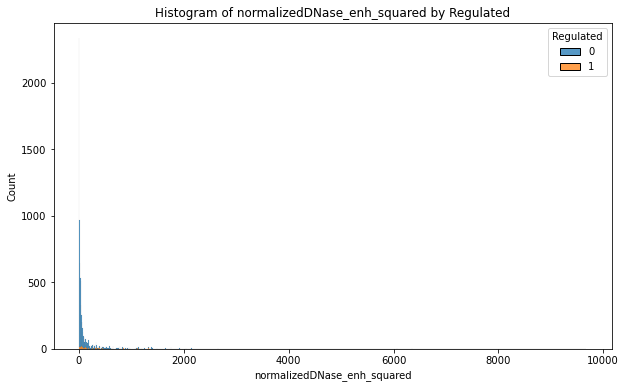

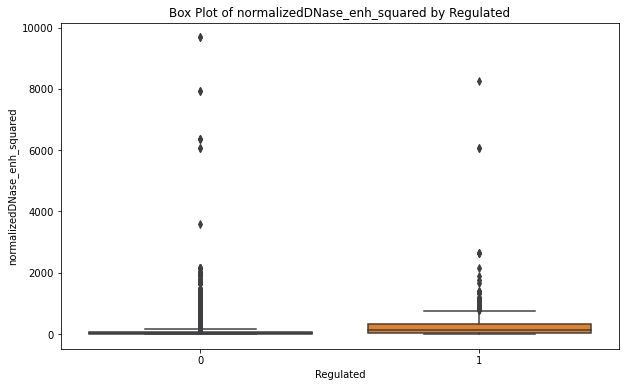

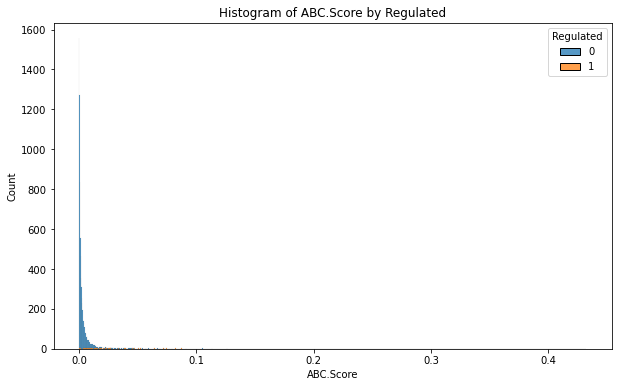

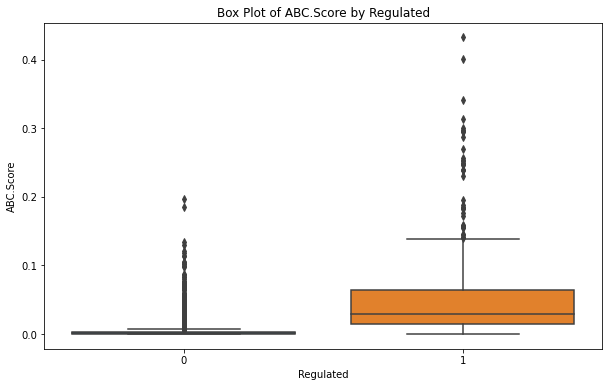

In [12]:
numeric_columns = ['EffectSize', 'PowerAtEffectSize10', 'pValueAdjusted', 'distanceToTSS', 
                  'numTSSEnhGene', 'numCandidateEnhGene', 'normalizedDNase_prom', 'numNearbyEnhancers',
                  'sumNearbyEnhancers', 'ubiquitousExpressedGene', '3DContact', '3DContact_squared', 
                  'normalizedDNase_enh_squared', 'ABC.Score']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='Regulated', multiple='stack')
    plt.title(f'Histogram of {column} by Regulated')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Regulated', y=column)
    plt.title(f'Box Plot of {column} by Regulated')
    plt.show()

# Analyzing All Columns

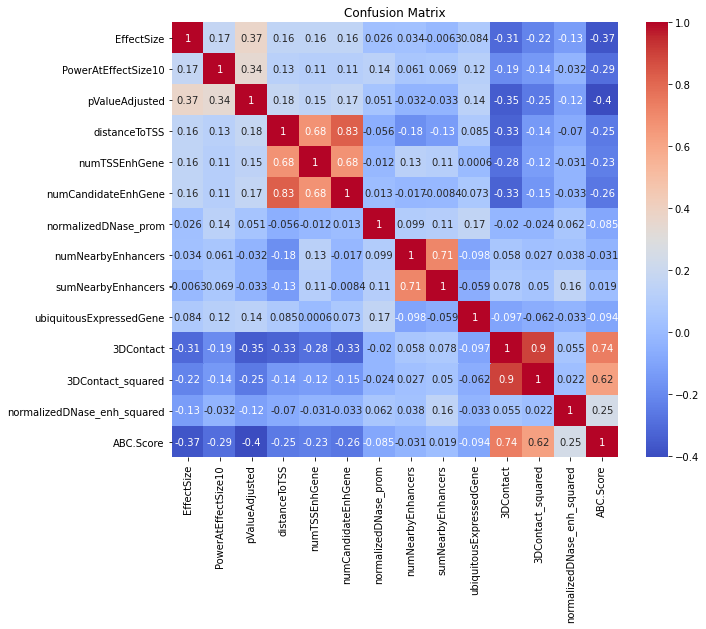

In [13]:
# Correlation of all numerical columns 
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

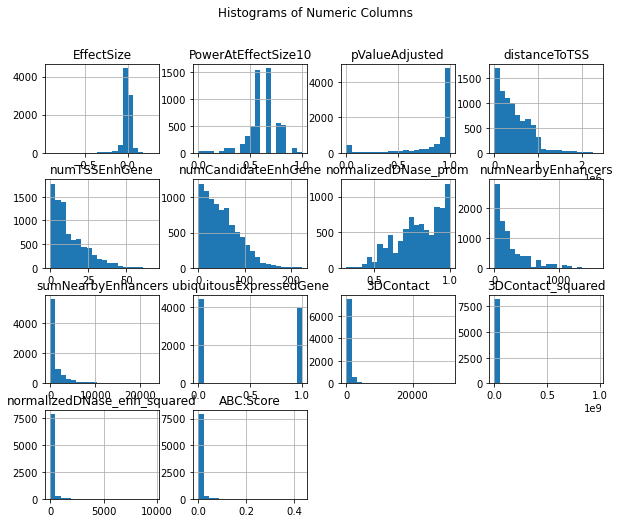

In [14]:
#histograms of numeric column distributions
df[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

In [19]:
#"significant" column == very important for regulated prediction
df['Significant'] ==  raw_data_cleaned['Regulated'] 

0       True
1       True
2       True
3       True
4       True
        ... 
8429    True
8430    True
8431    True
8432    True
8433    True
Length: 8349, dtype: bool

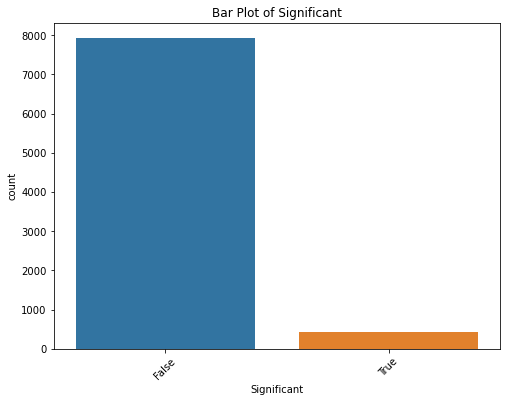

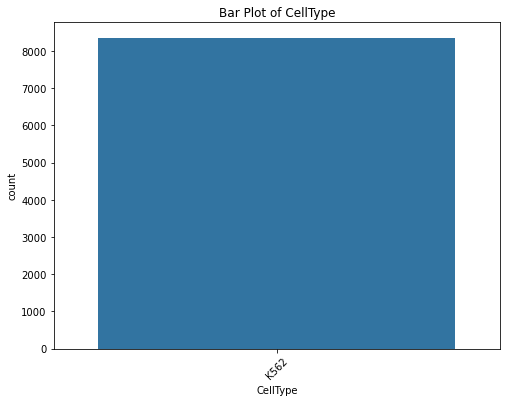

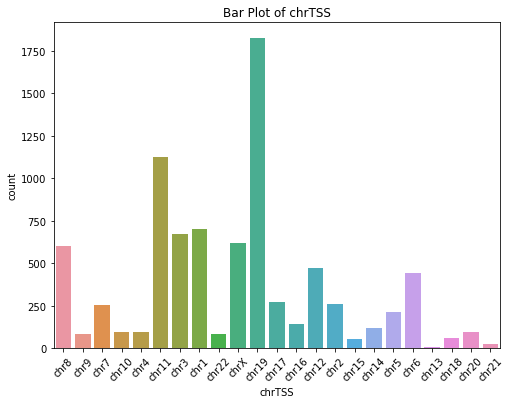

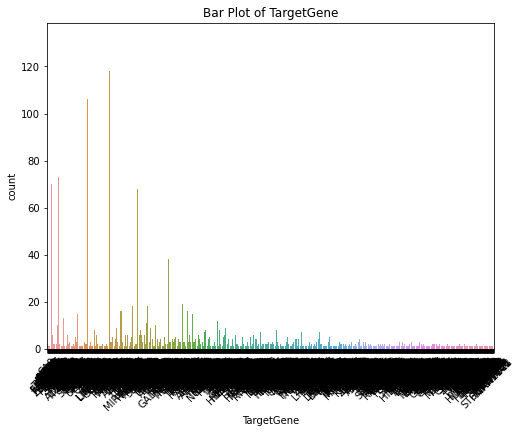

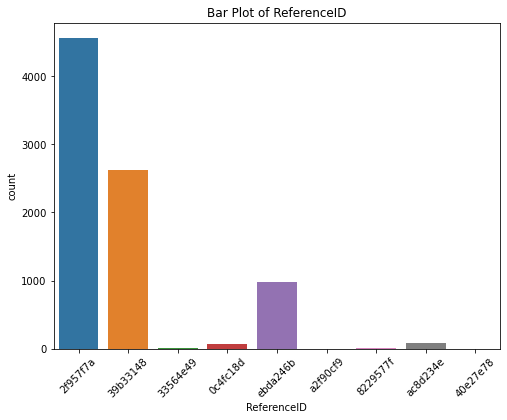

In [15]:
# Bar plots for categorical variables
# Cell Type is same for all -- don't need to include
# take a deeper dive into target gene
categorical_columns = ['Significant', 'CellType', 'chrTSS', 'TargetGene', 'ReferenceID']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()


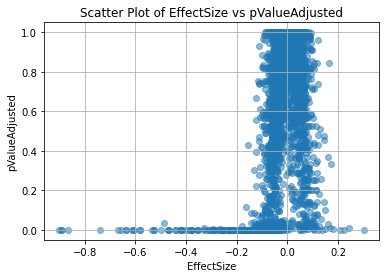

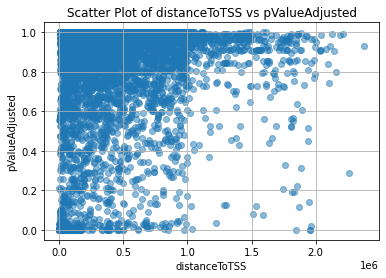

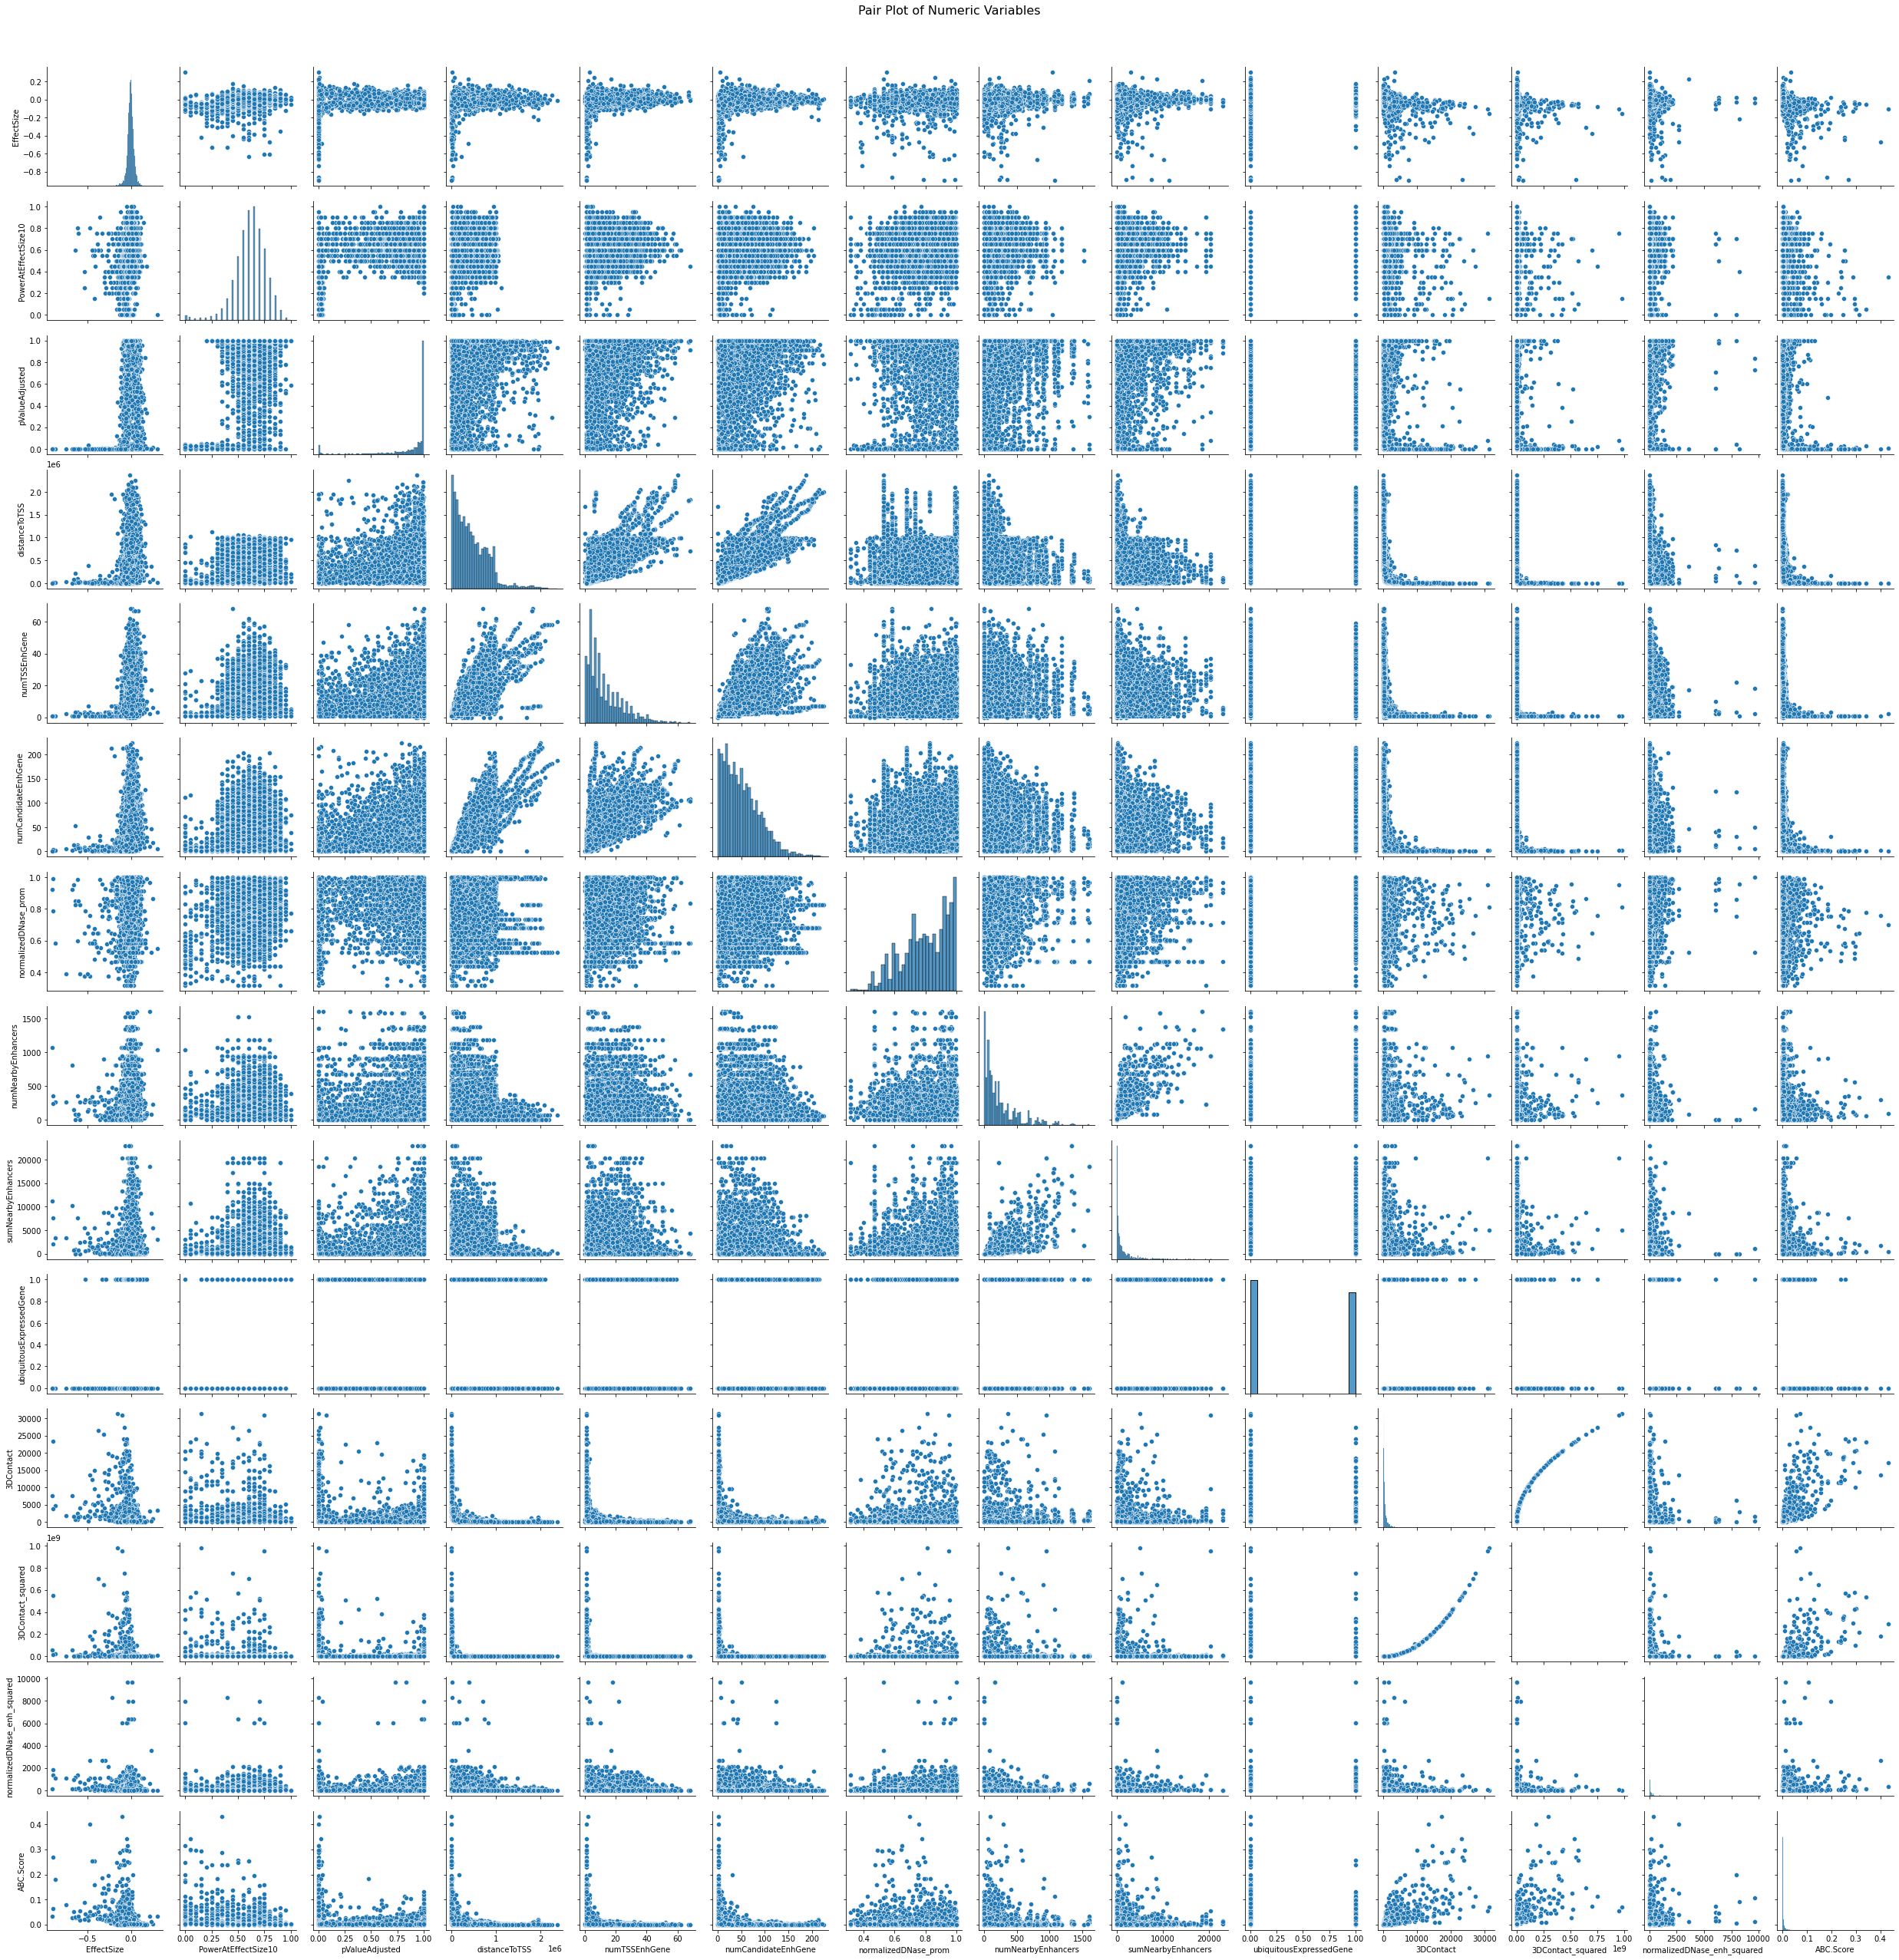

In [20]:
# Relationships between all variables

scatter_columns = ['EffectSize', 'distanceToTSS']
for column in scatter_columns:
    plt.scatter(df[column], df['pValueAdjusted'], alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs pValueAdjusted')
    plt.xlabel(column)
    plt.ylabel('pValueAdjusted')
    plt.grid(True)
    plt.show()

sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02, fontsize=16)
plt.show()